In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
### importing sicket learn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 1: Reading and understanding the data

In [4]:
bike_data = pd.read_csv(r'Z:\upgrad\ML\BikeSharing_Case_Study_Assignment\day.csv')

In [5]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Basic checks on data like shape,describe, info()

In [6]:
bike_data.shape

(730, 16)

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Findings:
<ul>
    <li>Dataset has 730 rows and 16 columns.</li>
    <li>Except for dteday rest all columns have either integer or float as data type.</li>
    <li>dteday has data type as object.</li>
    <li>Few columns looks like categorical,but are in format of int/float.</li>
    <li>Lets perform analysis on this data set and check whether do we need to convert categorical to int/float.</li>
</ul>

# Step 2: Data Qulaity Check

###  2.1 Check if any missing values

##### % of missing values:Columsn wise check

In [9]:
(bike_data.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### % of missing values:Row wise check

In [10]:
(bike_data.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Result Check:
<ul>
<li>There are no missing values either in rows or columns</li>
</ul>

### 2.2 Check for Duplicates

In [11]:
bike_duplicates = bike_data

In [12]:
bike_duplicates.drop_duplicates(inplace=True)

In [13]:
bike_duplicates.shape

(730, 16)

In [14]:
 bike_data.shape

(730, 16)

#### Result Check:
<ul>
<li>After performing drop_duplicates() on "bike_duplicates", the shape of the dataframe doesn't change and it is similar to original dataframe "bike_data". Hence there are no duplicate values in the given data set</li>
</ul>

### 2.3 Check any junk values in the given dataframe; we will exclude instant column as it looks like Index for the given dataframe

In [15]:
bike_data.instant.value_counts(ascending=False)

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [16]:
bike_junk=bike_data.iloc[:,1:16]

In [17]:
bike_junk.shape

(730, 15)

In [18]:
for i in bike_junk:
    print(bike_junk[i].sort_values(ascending=False))
    

729    31-12-2019
364    31-12-2018
668    31-10-2019
303    31-10-2018
607    31-08-2019
          ...    
59     01-03-2018
396    01-02-2019
31     01-02-2018
365    01-01-2019
0      01-01-2018
Name: dteday, Length: 730, dtype: object
280    4
335    4
346    4
345    4
344    4
      ..
386    1
385    1
384    1
383    1
729    1
Name: season, Length: 730, dtype: int64
365    1
480    1
482    1
483    1
484    1
      ..
245    0
246    0
247    0
248    0
0      0
Name: yr, Length: 730, dtype: int64
729    12
335    12
337    12
338    12
339    12
       ..
370     1
369     1
368     1
367     1
365     1
Name: mnth, Length: 730, dtype: int64
415    1
359    1
247    1
610    1
512    1
      ..
246    0
248    0
249    0
250    0
729    0
Name: holiday, Length: 730, dtype: int64
579    6
432    6
82     6
194    6
250    6
      ..
349    0
650    0
559    0
524    0
251    0
Name: weekday, Length: 730, dtype: int64
0      1
434    1
436    1
437    1
438    1
      ..
104  

#### Result Check:
<ul>
<li> There is no junk data in the given dataset </li>
</ul>

# 3.0 Exploratory data Analysis

#### Analysis of ride count average across all the days

In [19]:
bike_data['date'] = bike_data['dteday'].apply(lambda x: int(x.split('-')[0]))

In [20]:
date_dist = round(bike_data.groupby(by='date').cnt.mean()/len(bike_data), 2)

In [21]:
date_dist.head()

date
1    5.92
2    6.01
3    6.37
4    6.41
5    6.23
Name: cnt, dtype: float64

In [22]:
def plot_bar_graph(data, graph_title, x_axis_label, y_axis_label, x_label_rotation=0,x_text=None):
    fig, ax = plt.subplots(figsize=(15,8))
    graph_data = sns.barplot(x=data.index, y=data.values)
    graph_data_label = data.max()*0.01
    for index, value in enumerate(data.iteritems()):
        graph_data.text(index, value[1] + graph_data_label, round(value[1], 2), color='black', ha="center", rotation='horizontal')       
    if x_text is None:
        graph_data.set_xticklabels(graph_data.get_xticklabels(), rotation=x_label_rotation)
    else:
        graph_data.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 25})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

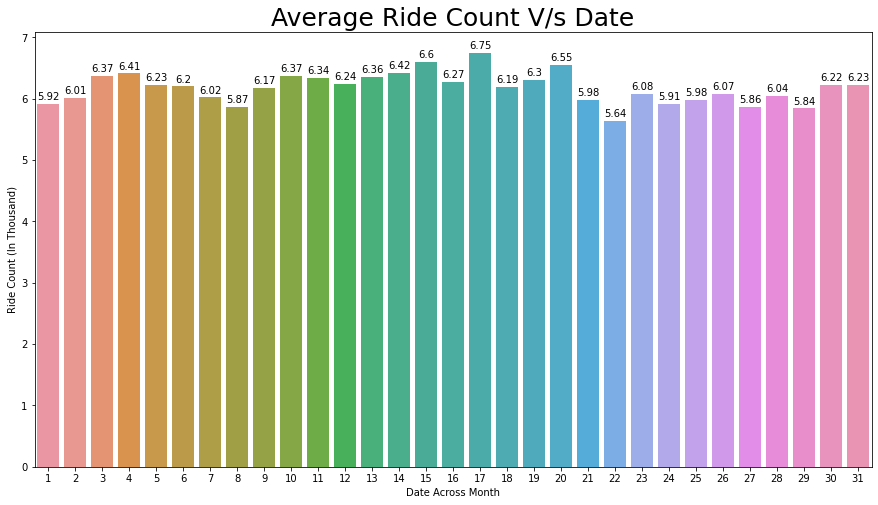

In [23]:
plot_bar_graph(data=date_dist, graph_title='Average Ride Count V/s Date', x_axis_label='Date Across Month',
                        y_axis_label='Ride Count (In Thousand)', x_label_rotation=0)

#### Result check
<ul>
   <li>We could not infer any significant insights,while visualizing the date data.
       </li></ul>

#### Analysis of ride count average across month

In [24]:
bike_data.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

#### Month column is varied between 1 and 12 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [25]:
import datetime
from scipy.stats import pearsonr

In [26]:
month_dist = bike_data.groupby(by='mnth').cnt.mean()

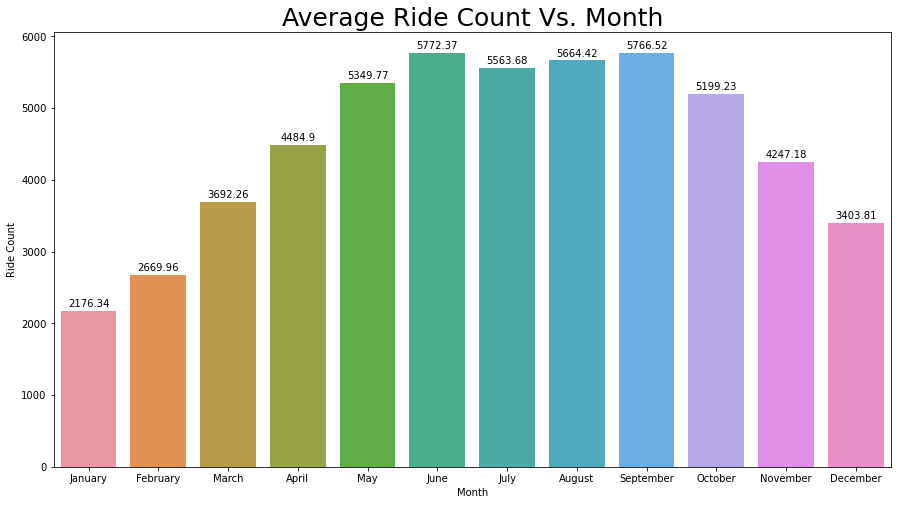

In [27]:
plot_bar_graph(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', x_label_rotation=0,
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

#### observation:
<ul>
We see that number of Ride Count drastically increases between May to October
</ul>

#### Analysis of ride count average across days of the week


In [28]:
weekday_dist = bike_data.groupby(by='weekday').cnt.mean()

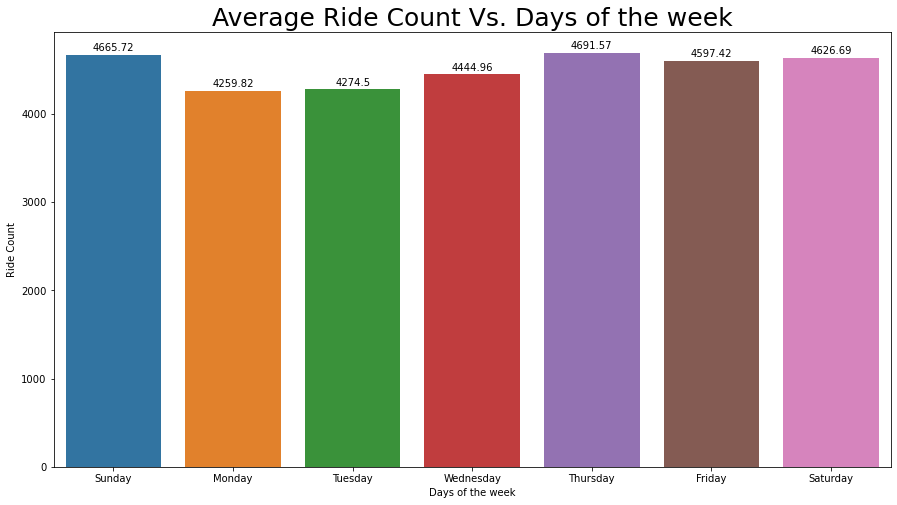

In [29]:
plot_bar_graph(data=weekday_dist, graph_title='Average Ride Count Vs. Days of the week', x_axis_label='Days of the week',
                        y_axis_label='Ride Count', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

#### observation:
<ul>
We see that number of Ride Count increases on Sunday and it is high compared to other days, though its not a working day.
</ul>

#### Impact of Weather on bike ride 

In [30]:
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Above data is a Categorical Nomimal Variable where evry number is mapped as follows
<ul>
1: clear <br>
2: mist <br>
3: light
</ul>

In [31]:
bike_data['weathersit'] = bike_data.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [32]:
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

#### Let's plot distrubution of Ride Count Mean Across Weather Situation¶

In [33]:
weathersit_dist = bike_data.groupby(by='weathersit').cnt.mean()

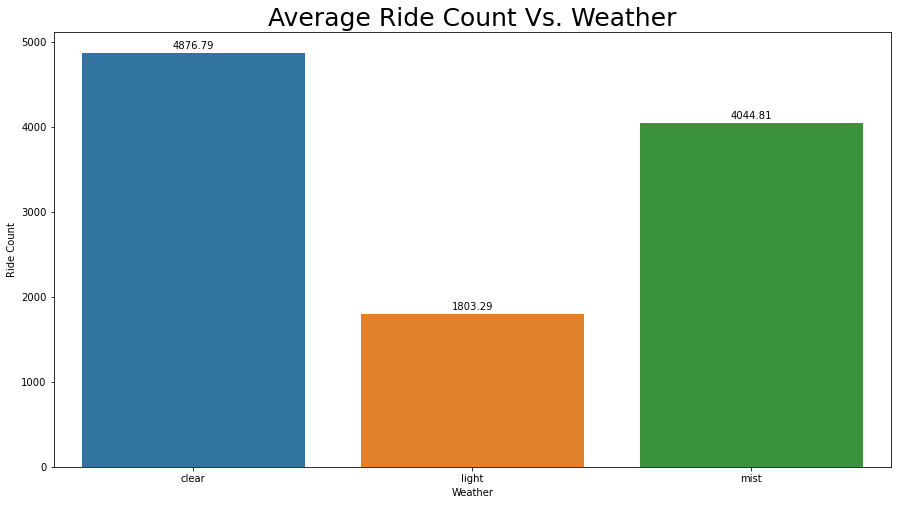

In [34]:
plot_bar_graph(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count',  x_label_rotation=0)

In [35]:
bike_data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

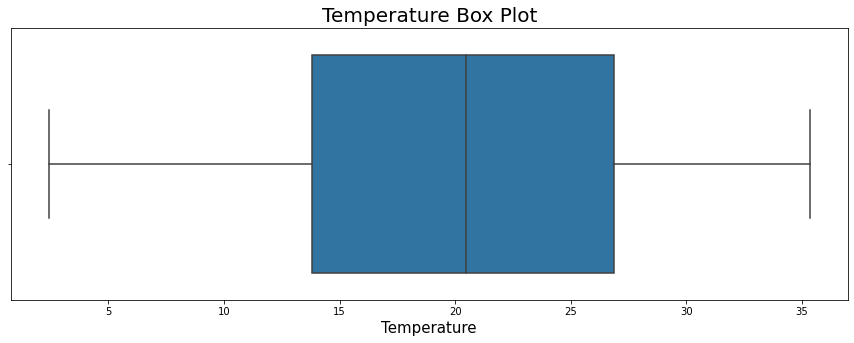

In [36]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bike_data, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})
plt.show()

#### Observation
<li>Temperature column is varied between a range which seems to be valid range, hence we can proceed ahead with this column without dropping / changing any records </li>

In [37]:
bike_data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Temperature')

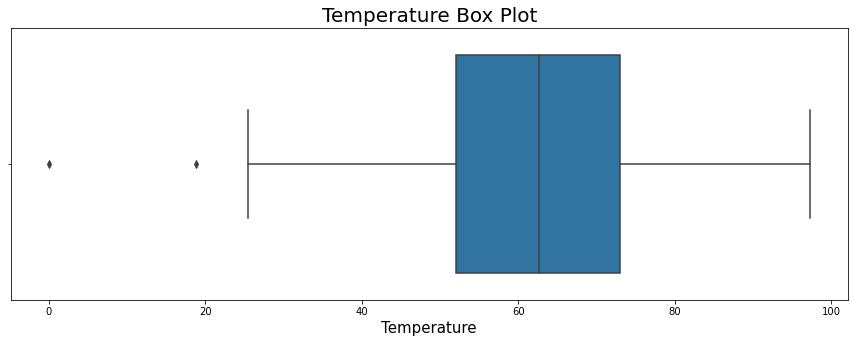

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bike_data, x='hum')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

### Visualising Numeric Variables
<li>Let's create a pairplot of numeric variables.</li>

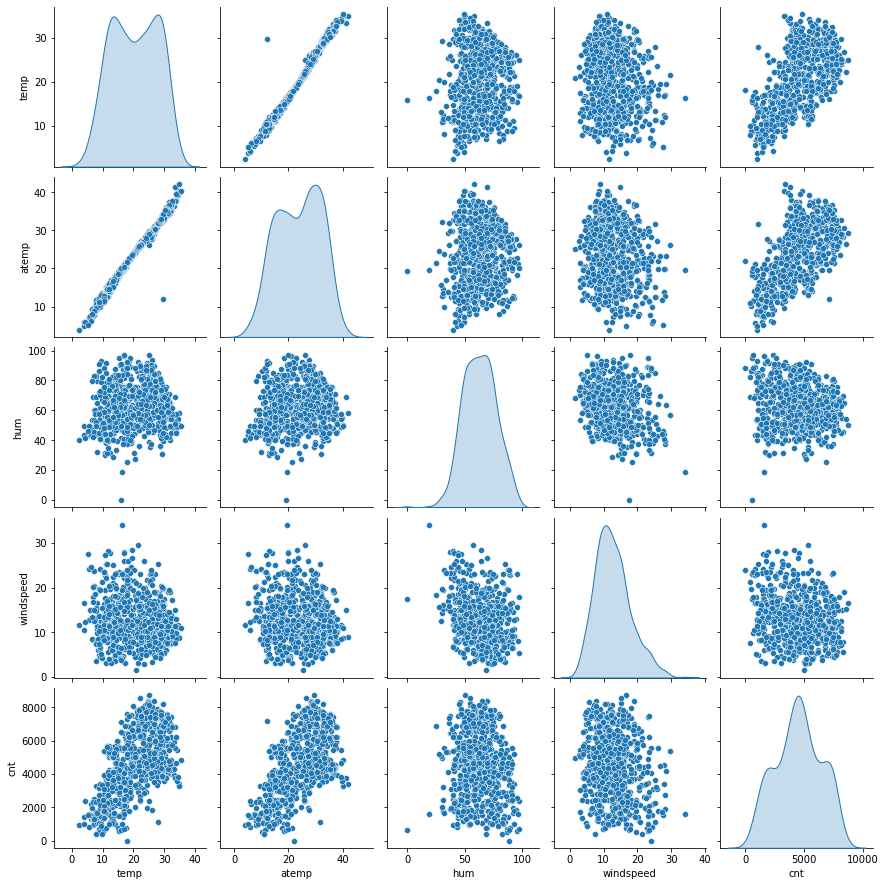

In [39]:
bike_num=bike_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### observation
<li>
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt
</li>

# 4.0 Removing unwanted columns from the dataframe

In [40]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'date'],
      dtype='object')

#### Following variables can be removed from analysis:
<ul>
<li> <b>instant</b> : Its only an index value </li>
  
<li> <b>dteday</b> : This has the date, Since we already have seperate columns for ,<b>'year' & 'month'</b>,hence, we could remove this column.</li>

<li><b>casual and registered</b> : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.</li>

<li>We will save the new dataframe as <b>bike</b>, so that the original dataset is preserved for any future analysis/validation</li>

</ul>

In [41]:
bike=bike_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [42]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 74.1+ KB


In [44]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 5.0 Creating Dummy Variables

### We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
<ul>
<li>Before creating dummy variables, we will have to convert them into 'category' data types.</li>
</ul>

In [45]:
# Convert to 'category' data type

bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [46]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [47]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy that was created
# 3) Drop first dummy variable for each set of dummies created.(we need only n-1 column if we have n columns)

bike = pd.get_dummies(bike, drop_first=True)

In [48]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_2          730 non-null    uint8  
 9   season_3          730 non-null    uint8  
 10  season_4          730 non-null    uint8  
 11  mnth_2            730 non-null    uint8  
 12  mnth_3            730 non-null    uint8  
 13  mnth_4            730 non-null    uint8  
 14  mnth_5            730 non-null    uint8  
 15  mnth_6            730 non-null    uint8  
 16  mnth_7            730 non-null    uint8  
 1

## 6.0 SPLITTING THE DATA
<ul>
<li>Split the data to <b>Train</b> and <b>Test</b>: - We will split the data into TRAIN and TEST in 70:30 ratio</li>
    <li>We will use <b>train_test_split</b> method from <b>sklearn package</b> for this, we have already imported this package</li></ul>

In [49]:
bike.shape

(730, 30)

In [50]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, random_state = 100)

In [51]:
# Lets cross verify the shape of test and train data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [52]:
# Check train and test info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   atemp             510 non-null    float64
 5   hum               510 non-null    float64
 6   windspeed         510 non-null    float64
 7   cnt               510 non-null    int64  
 8   season_2          510 non-null    uint8  
 9   season_3          510 non-null    uint8  
 10  season_4          510 non-null    uint8  
 11  mnth_2            510 non-null    uint8  
 12  mnth_3            510 non-null    uint8  
 13  mnth_4            510 non-null    uint8  
 14  mnth_5            510 non-null    uint8  
 15  mnth_6            510 non-null    uint8  
 16  mnth_7            510 non-null    uint8  


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   cnt               220 non-null    int64  
 8   season_2          220 non-null    uint8  
 9   season_3          220 non-null    uint8  
 10  season_4          220 non-null    uint8  
 11  mnth_2            220 non-null    uint8  
 12  mnth_3            220 non-null    uint8  
 13  mnth_4            220 non-null    uint8  
 14  mnth_5            220 non-null    uint8  
 15  mnth_6            220 non-null    uint8  
 16  mnth_7            220 non-null    uint8  


In [54]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

###  Checking Correlation between variables

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

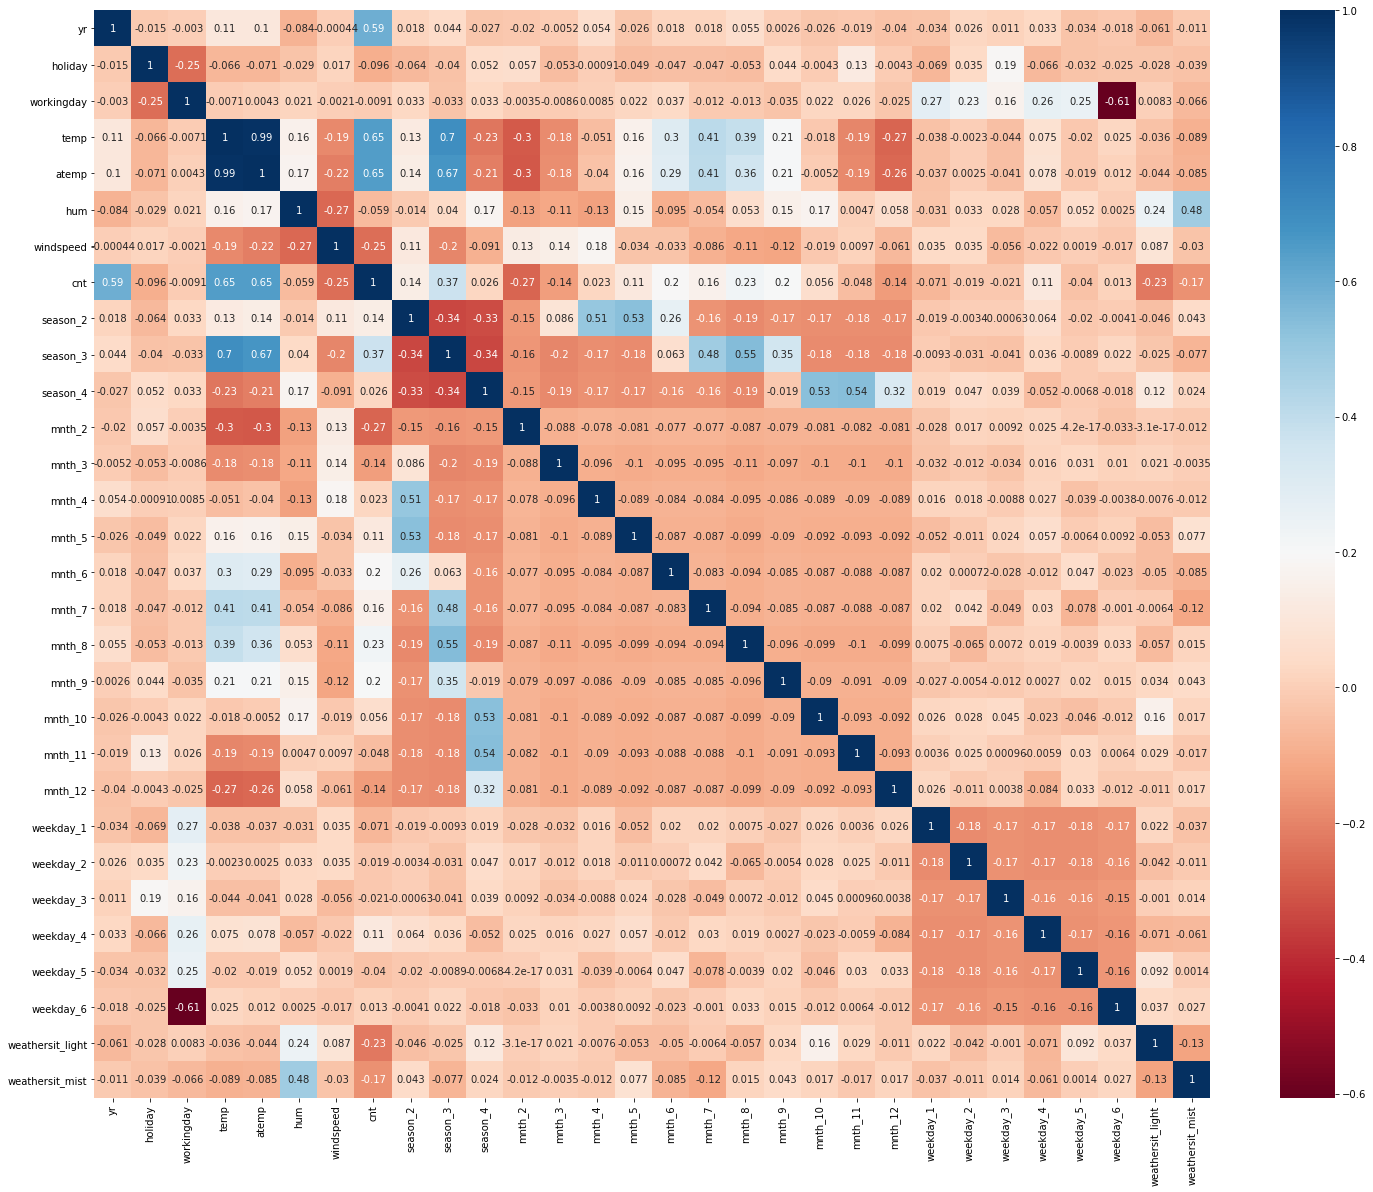

In [56]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

#### Insights
<li>The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.</li>
<li>We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model </li>

# 7.0 RESCALING THE FEATURES(Normalizing)
<ul>
    <li>We will be using MinMaxScaler approack using <b>sklearn.preprocessing import MinMaxScaler</b></li>
</ul>

In [57]:
scaler = MinMaxScaler()

In [58]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observation:
<ul>
    <li>
        We see features <b>['temp', 'atemp', 'hum', 'windspeed','cnt']</b> got rescaled from original values to <b> 0 and 1's</b>.
    </li>
</ul>

# 8.0 BUILDING A LINEAR MODEL

### 8.1. Fixing Trained Target Variable

In [62]:
y_train = df_train.pop('cnt')

### 8.2 Fixing Trained Feature(s) Variable

In [63]:
X_train = df_train

# 9.0 Iterative Modeling Process

<ul>
    <b>
<li>We have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be very hectic.</li>
    
<li>To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)</li>
    
<li>We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.
    Creating a generalised function for evaluating Variance Inflation Factor</li>     
    </b>
</ul>

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [66]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_light,True,1
13,mnth_5,True,1
11,mnth_3,True,1
9,season_4,True,1
28,weathersit_mist,True,1
7,season_2,True,1


### 
<li>
<b>RFE method has successfully evaluated top 15 predictors which will impact our outcome.
But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements.</b>
</li>

### Model Building Process -1

In [67]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.00e-188
Time:                        22:29:09   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2374      0.027      8.665      0.000       0.184       0.291
yr                   0.2304      0.008     28.453      0.000       0.215       0.246
holiday             -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp                 0.4869      0.034     14.119      0.000       0.419       0.555
hum                 -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed           -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2             0.1166      0.015      7.527      0.000       0.086       0.147
season_3             0.0425      0.023      1.847      0.065      -0.003       0.088
season_4             0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3               0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5               0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8               0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9               0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10              0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_light    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
weathersit_mist     -0.0542      0.010     -5.187      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
14,weathersit_mist,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


###  Observation:
<ul>
    In the above model we see high p- value for <b>"mnth_5"</b> which make its co-efficient insignificant. We will proceed ahead with dropping this feature and designing model again</ul>

## Model -2 

In [69]:
col = col.drop(['mnth_5'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.46e-189
Time:                        22:29:09   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2322      0.027      8.525      0.000       0.179       0.286
yr                   0.2298      0.008     28.366      0.000       0.214       0.246
holiday             -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp                 0.4965      0.034     14.604      0.000       0.430       0.563
hum                 -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed           -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_2             0.1225      0.015      8.137      0.000       0.093       0.152
season_3             0.0361      0.023      1.593      0.112      -0.008       0.081
season_4             0.1502      0.014     10.671      0.000       0.123       0.178
mnth_3               0.0279      0.014      1.931      0.054      -0.000       0.056
mnth_8               0.0505      0.018      2.883      0.004       0.016       0.085
mnth_9               0.1202      0.017      6.946      0.000       0.086       0.154
mnth_10              0.0393      0.018      2.231      0.026       0.005       0.074
weathersit_light    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
weathersit_mist     -0.0544      0.010     -5.199      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.53
7,season_4,3.05
13,weathersit_mist,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.63


####  Observation:
<ul>
    We see high P-values for variable <b>"mnth_3"</b>,though we see low VIF for this.We will drop these value and analyze the model. 
</ul>

## Model -3 

In [71]:
col = col.drop(['mnth_3'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.07e-189
Time:                        22:29:09   Log-Likelihood:                 510.77
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2397      0.027      8.867      0.000       0.187       0.293
yr                   0.2297      0.008     28.280      0.000       0.214       0.246
holiday             -0.0932      0.026     -3.650      0.000      -0.143      -0.043
temp                 0.5001      0.034     14.691      0.000       0.433       0.567
hum                 -0.1754      0.038     -4.649      0.000      -0.250      -0.101
windspeed           -0.1838      0.026     -7.143      0.000      -0.234      -0.133
season_2             0.1184      0.015      7.921      0.000       0.089       0.148
season_3             0.0273      0.022      1.225      0.221      -0.016       0.071
season_4             0.1429      0.014     10.508      0.000       0.116       0.170
mnth_8               0.0507      0.018      2.887      0.004       0.016       0.085
mnth_9               0.1206      0.017      6.953      0.000       0.087       0.155
mnth_10              0.0387      0.018      2.193      0.029       0.004       0.073
weathersit_light    -0.2419      0.026     -9.136      0.000      -0.294      -0.190
weathersit_mist     -0.0540      0.010     -5.146      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       68.271   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.540
Skew:                          -0.692   Prob(JB):                     4.16e-37
Kurtosis:                       5.443   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.86
3,hum,15.32
6,season_3,8.18
4,windspeed,3.65
5,season_2,3.46
7,season_4,2.85
12,weathersit_mist,2.15
0,yr,2.03
8,mnth_8,1.85
10,mnth_10,1.62


#### Observation:
<ul>
    we see high p-value for <b>Season_3</b> We ll drop this value and analyse further.
</ul>

## Model -4

In [73]:
col = col.drop(['season_3'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.49e-190
Time:                        22:29:09   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2390      0.027      8.838      0.000       0.186       0.292
yr                   0.2289      0.008     28.264      0.000       0.213       0.245
holiday             -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                 0.5316      0.022     23.836      0.000       0.488       0.575
hum                 -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed           -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_2             0.1058      0.011      9.719      0.000       0.084       0.127
season_4             0.1353      0.012     11.180      0.000       0.112       0.159
mnth_8               0.0585      0.016      3.583      0.000       0.026       0.091
mnth_9               0.1277      0.016      7.803      0.000       0.096       0.160
mnth_10              0.0358      0.018      2.046      0.041       0.001       0.070
weathersit_light    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
weathersit_mist     -0.0531      0.010     -5.073      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,season_4,2.25
11,weathersit_mist,2.13
0,yr,2.02
5,season_2,1.84
7,mnth_8,1.60
9,mnth_10,1.60
8,mnth_9,1.34


### Observation:
<ul>
In above model the p-values are well with in the defined nange but there is higher VIF values for variable "hum", we wll drop these and analyse the model.
</ul>

## Model-5

In [75]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          9.45e-187
Time:                        22:29:09   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1346      0.017      8.014      0.000       0.102       0.168
yr                   0.2329      0.008     28.281      0.000       0.217       0.249
holiday             -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp                 0.5099      0.022     22.823      0.000       0.466       0.554
windspeed           -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_2             0.1026      0.011      9.237      0.000       0.081       0.124
season_4             0.1266      0.012     10.345      0.000       0.103       0.151
mnth_8               0.0569      0.017      3.406      0.001       0.024       0.090
mnth_9               0.1208      0.017      7.245      0.000       0.088       0.154
mnth_10              0.0311      0.018      1.741      0.082      -0.004       0.066
weathersit_light    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
weathersit_mist     -0.0820      0.009     -9.299      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.93
4,season_2,1.83
6,mnth_8,1.59
8,mnth_10,1.59
10,weathersit_mist,1.49
7,mnth_9,1.34
9,weathersit_light,1.10


### Observation:
<ul>
    In above model, the p-value is higher for variable <b>"mnth_10"</b>, we wll drop these and analyse the model.
</ul>

## Model-6

In [77]:
col = col.drop(['mnth_10'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_sm)
lr6_model = lr6.fit()
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.62e-187
Time:                        22:29:09   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1307      0.017      7.837      0.000       0.098       0.163
yr                   0.2326      0.008     28.191      0.000       0.216       0.249
holiday             -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp                 0.5173      0.022     23.546      0.000       0.474       0.561
windspeed           -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2             0.1012      0.011      9.116      0.000       0.079       0.123
season_4             0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8               0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9               0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_light    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
weathersit_mist     -0.0811      0.009     -9.200      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
9,weathersit_mist,1.49
5,season_4,1.48
7,mnth_9,1.31
8,weathersit_light,1.08
1,holiday,1.04


In [79]:
lr6_model.params

const               0.130722
yr                  0.232563
holiday            -0.096575
temp                0.517336
windspeed          -0.149709
season_2            0.101217
season_4            0.137090
mnth_8              0.054141
mnth_9              0.116291
weathersit_light   -0.281852
weathersit_mist    -0.081139
dtype: float64

### Observation:
<ul>
    This model looks good, as there seems to be <b>Very Low Multicollinearity</b> between the predictors and the <b>p-values for all the predictors seems to be significantly low</b>. Though we VIF as 5.01 for "Temp" variable this seems to be important in this analysis, hence we will continue with this variable and model.  For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number). </ul>

# Step 10 : Final Model Interpretation For Linear Regrssion Assumptions

####  According to Hypothesis Testing:
<ul>
Hypothesis testing states that:

<b>Null Hypothesis</b> H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero) <br>
<b> Alternate Hyposthesis</b> H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)
</ul>

### From the model-6 summary, 
<ul>It is evident that all our coefficients are not equal to zero which means <b>WE REJECT THE NULL HYPOTHESIS</b></ul>

In [80]:
lr6_model.params

const               0.130722
yr                  0.232563
holiday            -0.096575
temp                0.517336
windspeed          -0.149709
season_2            0.101217
season_4            0.137090
mnth_8              0.054141
mnth_9              0.116291
weathersit_light   -0.281852
weathersit_mist    -0.081139
dtype: float64

### The equation of best fitted surface based on model-6
<ul>
    <p style="color:blue;font-size:20px;">
 <b>CNT</b>(Target Varibale) = 0.130722 + (yr × 0.232563) - (holiday × 0.096575) + (temp × 0.517336) − (windspeed × 0.149709) + (season_2 × 0.101217) + (season_4 × 0.137090) + (mnth_8 × 0.054141) +(mnth_9 x 0.116291)  − (weathersit_light ×0.281852) − (weathersit_mist × 0.081139)
    </p>
 </ul>

### 10.1 Residual Analysis of the train data

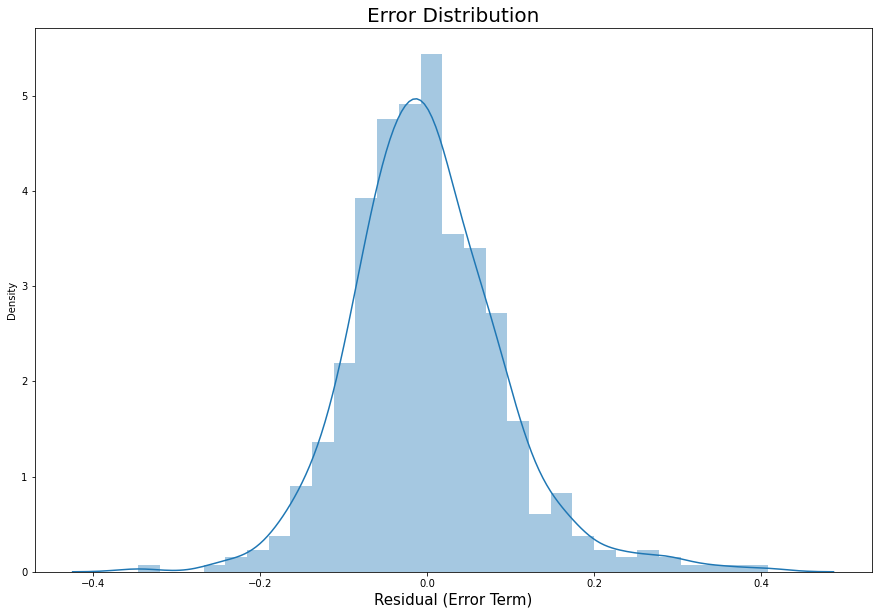

In [81]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr6_model.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

### Note: 
<ul><b>From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly</b></ul>

### 10.2 Validating homoscedasticity

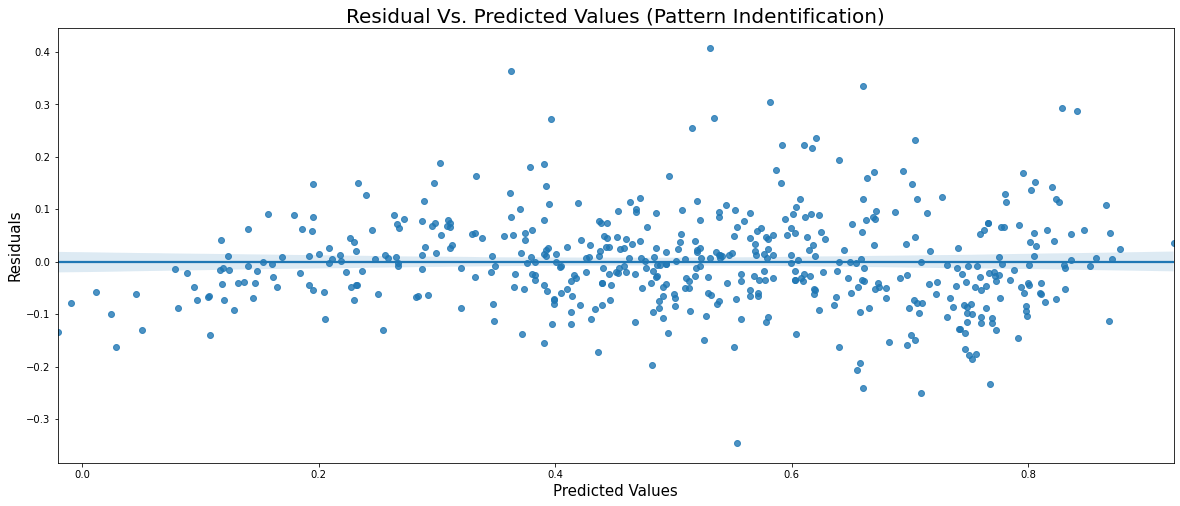

In [148]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [83]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 1.0269562977782698e-15


### 10.3 Validating Independence of residuals

In [168]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

The Durbin-Watson value for Final Model lr 6 is 2.06


#### From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern. This describes homoscedasticity

### 10.4 Validating Linearity

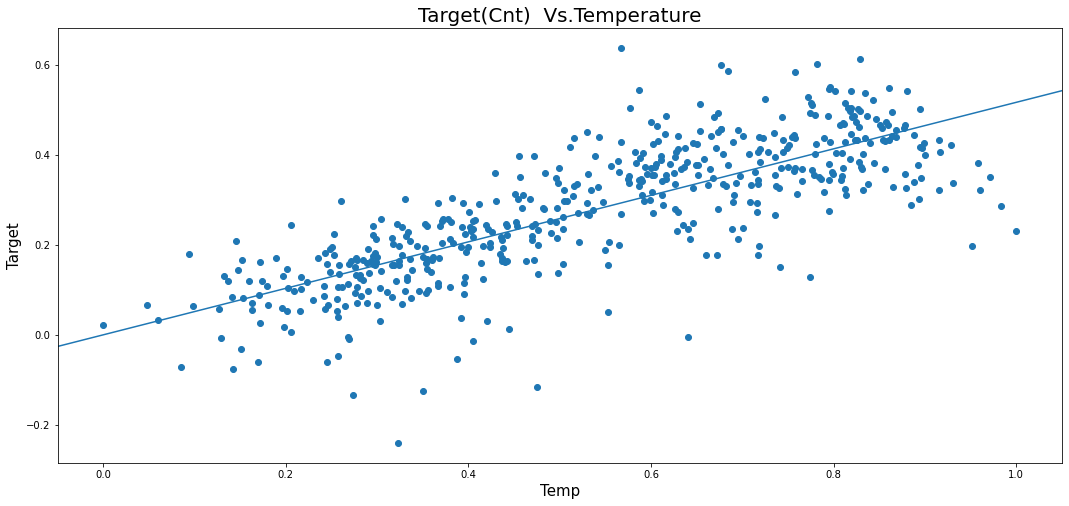

In [163]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'temp',ax=ax)
plt.title('Target(Cnt)  Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

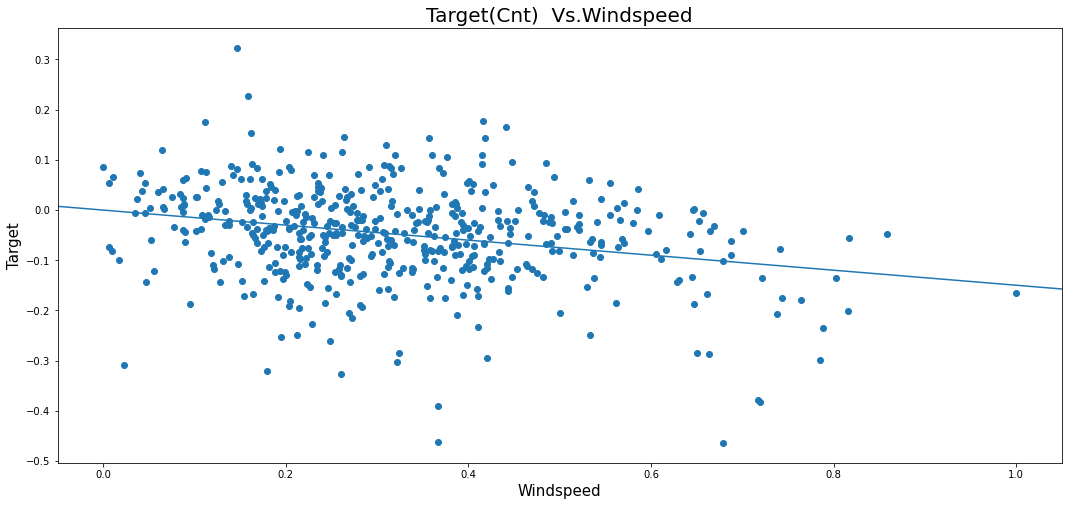

In [166]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'windspeed', ax=ax)
plt.title('Target(Cnt)  Vs.Windspeed', fontdict={'fontsize': 20})
plt.xlabel('Windspeed', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

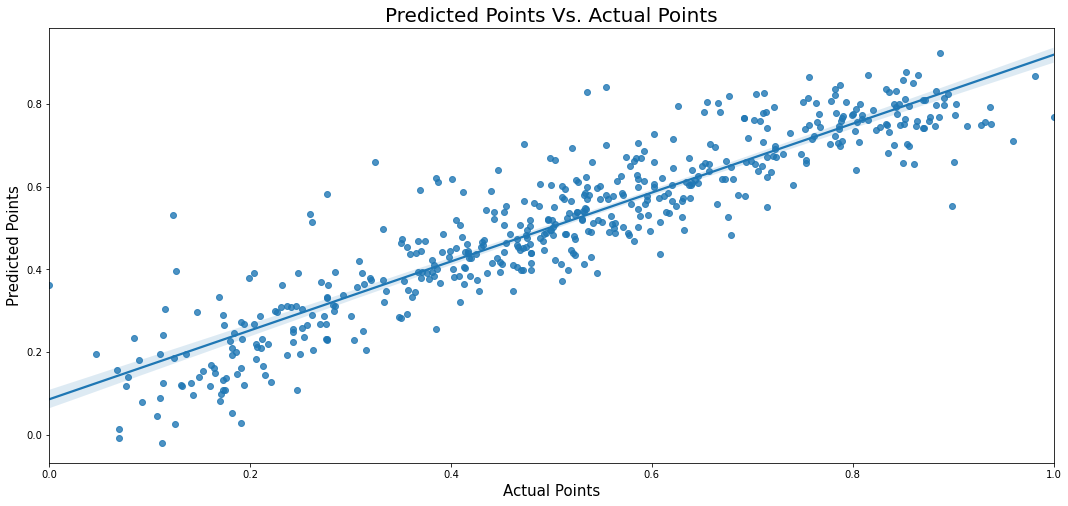

In [84]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

### Observation:
<ul>
From the above graph, we can say that residuals are equal distributed across predicted value.
This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions. <br>
    
This proves Homoscedasticity of Error Terms
</ul>

### 10.5 Validating Absence of  Multicolinearity

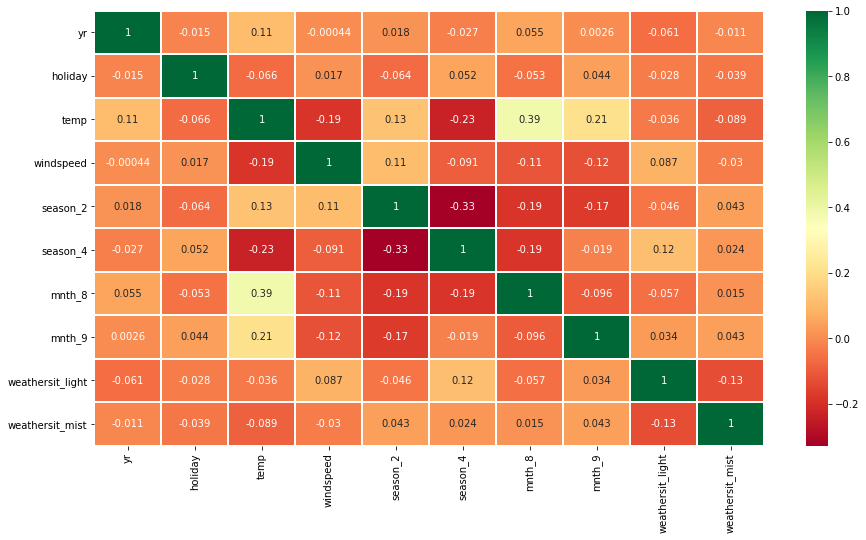

In [147]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

## R Sqaure Observation for Train Data

In [112]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_train, y_train_pred)

0.8338606244120907

# 11.0 Predicting on Test Data

In [86]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [87]:
df_test[num_vars].head(10)

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
404,10.865000,13.09940,56.2083,13.000479,3830
198,30.613347,35.19625,65.1250,14.458868,4458
171,27.914153,31.88230,77.0417,11.458675,4835
512,29.212500,33.96500,67.6250,13.166907,6043
200,31.501653,37.34250,70.7083,7.625739,4332


In [88]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 11.1 Fixing Test Target Variable

In [90]:
y_test = df_test.pop('cnt')

### 11.2 Fixing Test Feature(s) Variable

In [91]:
X_test = df_test

In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   season_2          220 non-null    uint8  
 8   season_3          220 non-null    uint8  
 9   season_4          220 non-null    uint8  
 10  mnth_2            220 non-null    uint8  
 11  mnth_3            220 non-null    uint8  
 12  mnth_4            220 non-null    uint8  
 13  mnth_5            220 non-null    uint8  
 14  mnth_6            220 non-null    uint8  
 15  mnth_7            220 non-null    uint8  
 16  mnth_8            220 non-null    uint8  


### 11.3 Filtering Test Input (Reserving Required Features)

In [93]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [94]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             220 non-null    float64
 1   yr                220 non-null    int64  
 2   holiday           220 non-null    int64  
 3   temp              220 non-null    float64
 4   windspeed         220 non-null    float64
 5   season_2          220 non-null    uint8  
 6   season_4          220 non-null    uint8  
 7   mnth_8            220 non-null    uint8  
 8   mnth_9            220 non-null    uint8  
 9   weathersit_light  220 non-null    uint8  
 10  weathersit_mist   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [95]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_light,weathersit_mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0,0


### 11.4 Predicting Test Data Using Developed Model

In [96]:
y_pred = lr6_model.predict(X_test_new)

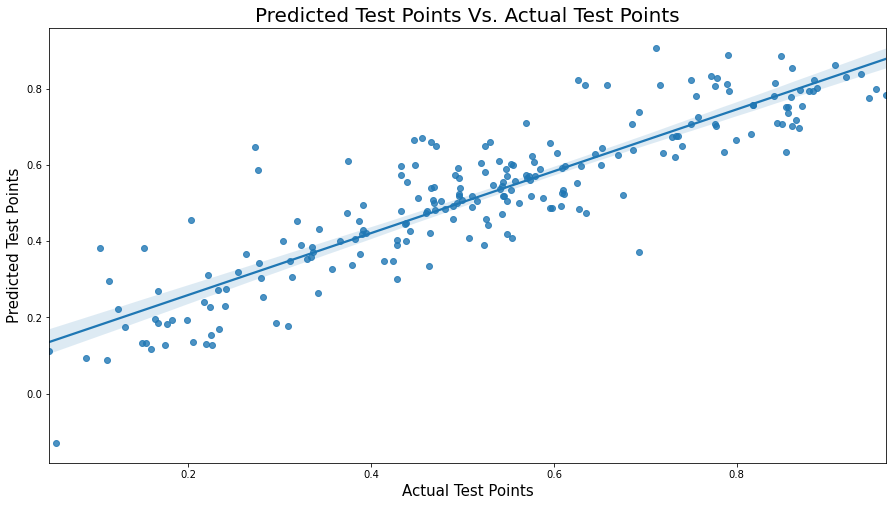

In [97]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [134]:
y_pred.head()

184    0.370711
535    0.907790
299    0.401497
221    0.590123
152    0.574274
dtype: float64

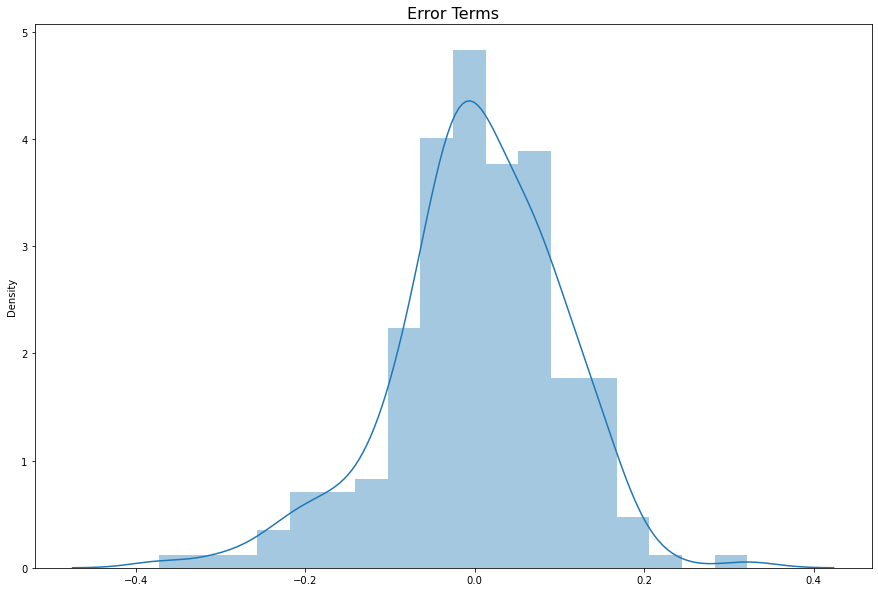

In [116]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

### The above distribution plot of error term shows the normal distribution with mean at Zero.

### 11.5 Generating R-Square

In [98]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7935224695104379

### 11.6 Generating Adjusted R2

In [99]:
X_test_new.shape

(220, 11)

In [100]:
n= X_test_new.shape[0]
n

220

In [101]:
p = X_test_new.shape[1]
p

11

In [102]:
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7826029847249323

In [114]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0099


# 12. Final Report on Test & Train

###  Final Comparision of R^2 and Adjsuted R^2.
<ul>
<li>Train R^2 : <b>0.8303</b> [Train values results are taken from Model-6]</li>
    <li>Train Adjusted R^2 :<b>0.827</b> [Train values results are taken from Model-6] </li> 
    <li>Test R^2 :<b>0.7941</b></li>
    <li>Test Adjusted R^2 :<b>0.7843</b></li>
<li>This seems to be a decent model that can very well 'Generalize' various datasets.</li>
</ul>

In [110]:
lr6_model.params

const               0.130722
yr                  0.232563
holiday            -0.096575
temp                0.517336
windspeed          -0.149709
season_2            0.101217
season_4            0.137090
mnth_8              0.054141
mnth_9              0.116291
weathersit_light   -0.281852
weathersit_mist    -0.081139
dtype: float64

### Concluding Points

<ul>
<p><li>We can conclude that the model Model-6 fit isn't by chance, and has descent predictive power.</li></p>
    
<p>As per our final Model, the top 3 predictor variables that influences the bike booking are:</p>
    <p><li><b>temp,  mnth_8, yr </b></li>
      <li>A unit increase in <b> temp(Temperature) </b> variable increase the bike hire numbers by 0.517336 units.</li> 
    <li>A unit increase in <b> mnth_8 </b> variable increase the bike hire numbers by 0.054141 units.</li> 
    <li>A unit increase in <b> yr(Year) </b> variable increase the bike hire numbers by 0.232563 units.</li>
    <b>So it recommended to give above variables utmost importance while planning to achieve maximum demand.</b>
    </p>
    <br>
    <p> Next best variables to be considered:
        <li><b>Holiday</b> - A coefficient value of ‘-0.096575’ indicated that a unit increase in holiday  variable decreases bike hire numbers by 0.096575 units.</li></p>
   <p><li><b>windspeed</b> - A coefficient value of ‘-0.149709’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.149709 units.</li></p>
    
 </ul>
 <br>
 
<ul>
     <p style="color:Blue;font-size:20px;"><b> The equation of our best fitted line is:</b><br>
        CNT(Target variable) = 0.130722 + (yr × 0.232563) - (holiday × 0.096575) + (temp × 0.517336) − (windspeed × 0.149709) + (season_2 × 0.101217) + (season_4 × 0.137090) + (mnth_8 × 0.054141) +(mnth_9 x 0.116291) − (weathersit_light ×0.281852) − (weathersit_mist × 0.081139)
     </p>

</ul>
